#### encodes labels of samples

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn import manifold
from sklearn.metrics import classification_report

# Encode Label

In [2]:
label = pd.read_excel('data_label.xlsx')

In [3]:
label

,ENSGID,Protein Name,HPA抗体ID,Tissue,No. of Normal Images,No. of Cancer Images,Label,Additional Labels,Annotation Reliability,GO term,GO term for additional label,Uniprot ID,Entrez ID
0,'ENSG00000004975','DVL2','22914','liver',3,24,'Nucleus but not nucleoli',[],'Supportive','GO:0005654',[],'O14641','1856'
1,'ENSG00000005175','RPAP3','38311','liver',3,20,'Cytoplasm',[],'Uncertain','GO:0005737',[],'Q9H6T3','79657'
2,'ENSG00000005379','BZRAP1','24662','liver',3,24,'Nucleoli','Mitochondria','Uncertain','GO:0005730','GO:0005739','O95153','9256'
3,'ENSG00000005893','LAMP2','5272','liver',3,20,'Cytoskeleton (Intermediate filaments)',[],'Uncertain','GO:0045111',[],'P13473','3920'
4,'ENSG00000006453','AC093799.1','21257','liver',3,21,'Plasma membrane','Cytoplasm','Supportive','GO:0005886','GO:0005737','Q9UHR4','55971'
5,'ENSG00000006625','GGCT','20735','liver',3,23,'Golgi apparatus',[],'Uncertain','GO:0005794',[],'O75223','79017'
6,'ENSG00000006756','ARSD','4694','liver',3,22,'Vesicles',[],'Supportive','GO:0043231',[],'P51689','414'
7,'ENSG00000007376','RPUSD1','41144','liver',3,20,'Nucleus;Cytoplasm;Golgi apparatus','Cell Junctions','Uncertain','GO:0005634;GO:0005737;GO:0005794','GO:0030054','Q9UJJ7','113000'
8,'ENSG00000008018','PSMB1','33911','liver',3,23,'Nucleus','Cytoplasm;Cytoskeleton (Intermediate filaments)','Supportive','GO:0005634','GO:0005737;GO:0045111','P20618','5689'
9,'ENSG00000008513','ST3GAL1','40466','liver',3,21,[],[],[],[],[],'Q11201','6482'


In [4]:
sp = string.punctuation.replace('(','').replace(')','')
size = label['Label'].values.size
cate = []
for i in range(size):
    a = label['Label'].values[i]
    s = a.encode('ascii','ignore')
    s = s.strip(sp).split(';')
    cate = list(set().union(s,cate))

In [5]:
print('\n# of categories: %d'%len(cate))


# of categories: 18


In [25]:
cate

['',
 'Nucleus but not nucleoli',
 'Golgi apparatus',
 'Nucleoli',
 'Focal Adhesions',
 'Cytoplasm',
 'Mitochondria',
 'Cell Junctions',
 'Cytoskeleton (Microtubules)',
 'Microtubule organizing center',
 'Cytoskeleton (Actin filaments)',
 'Nucleus',
 'Endoplasmic reticulum',
 'Cytoskeleton (Intermediate filaments)',
 'Vesicles',
 'Centrosome',
 'Plasma membrane',
 'Nuclear membrane']

In [6]:
le = preprocessing.LabelEncoder()
le.fit(cate)

LabelEncoder()

In [7]:
enc_label = []
for i in range(size):
    a = label['Label'].values[i]
    s = a.encode('ascii','ignore').strip(sp).split(';')
    s_ = list(le.transform(s))
    enc_label.append(s_)
enc_label = MultiLabelBinarizer().fit_transform(enc_label)

In [8]:
print(enc_label)
enc_label.shape

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


(500, 18)

In [9]:
print(le.transform(['', 'Cytoplasm','Mitochondria','Vesicles', 'Endoplasmic reticulum', 'Golgi apparatus']))
print(le.transform(['Nucleus but not nucleoli','Nucleoli','Nucleus']))

[ 0  3 11 17  7  9]
[15 13 14]


In [10]:
label_list = le.transform(['', 'Cytoplasm','Mitochondria', 'Nucleus','Nucleoli','Nucleus but not nucleoli', 
              'Vesicles', 'Endoplasmic reticulum', 'Golgi apparatus'])
print(label_list)

[ 0  3 11 14 13 15 17  7  9]


In [11]:
enc_label_ = enc_label[:,label_list]
final_enc_label = np.concatenate((enc_label_[:,:3], 
                                  (np.sum(enc_label_[:, [3,4,5]], axis=1)>0).astype(int).reshape(-1,1), 
                                  enc_label_[:,6:]), axis=1)
# np.save('label', final_enc_label)

In [14]:
# Final Labels

# None: 0 
# Cytoplasm: 1
# Mitochondria: 2 
# Nucleus, Nucleoli, Nucleus but not nucleoli: 3
# Vesicles: 4
# Endoplasmic reticulum: 5 
# Golgi apparatus: 6

In [12]:
final_enc_label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

# Statistics

In [13]:
print('Number of labels')
print('0 labels: %d samples'%np.sum(enc_label[:,0]==1))
print('1 labels: %d samples'%np.sum(np.sum(enc_label[enc_label[:,0]==0],axis=1)==1))
print('2 labels: %d samples'%np.sum(np.sum(enc_label[enc_label[:,0]==0],axis=1)==2))
print('3 labels: %d samples'%np.sum(np.sum(enc_label[enc_label[:,0]==0],axis=1)==3))

Number of labels
0 labels: 133 samples
1 labels: 274 samples
2 labels: 82 samples
3 labels: 11 samples


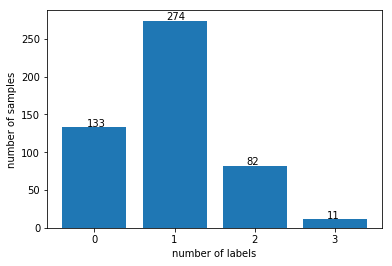

In [24]:
L = [133,274,82,11]
plt.bar(np.arange(4), L)
for i in range(4):
    plt.text(i-0.1, L[i]+1, L[i])
plt.ylabel('number of samples')
plt.xlabel('number of labels')
plt.xticks(np.arange(4))
plt.savefig('label_vs_samples.png', dpi=100)
plt.show()

In [16]:
print('Annotation Reliability')
print('supportive: %d samples'%np.sum(label['Annotation Reliability'].values == u"'Supportive'"))
print('uncertain: %d samples'%np.sum(label['Annotation Reliability'].values == u"'Uncertain'"))
print('unknown: %d samples'%np.sum(label['Annotation Reliability'].values == u'[]'))

Annotation Reliability
supportive: 236 samples
uncertain: 131 samples
unknown: 133 samples


In [17]:
label_num_sample = []
num_label = enc_label.shape[1]
for i in range(num_label):
    label_num_sample.append(np.sum(enc_label[:,i]))
print(label_num_sample)

[133, 3, 5, 129, 2, 5, 5, 21, 2, 15, 1, 58, 4, 18, 57, 86, 26, 34]


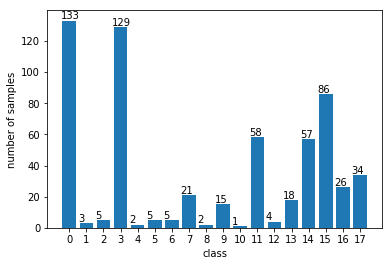

In [23]:
plt.bar(np.arange(num_label), label_num_sample)
for i in range(num_label):
    plt.text(i-0.5, label_num_sample[i]+1, label_num_sample[i])
plt.ylabel('number of samples')
plt.xlabel('class')
plt.xticks(np.arange(num_label))
plt.savefig('class_vs_samples.png', dpi=100)
plt.show()